In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
# import dependencies
import logging
import numpy as np

import htfa_torch.tfa as TFA
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s',
                            datefmt='%m/%d/%Y %H:%M:%S',
                            level=logging.INFO)

In [4]:
tfa = TFA.TopographicalFactorAnalysis('data/pieman_data/sub-001-task-intact1.nii', num_factors=25)

In [5]:
prior_sample = tfa.sample()

logging.info('Prior Reconstruction Error (Frobenius Norm): %.8e', np.linalg.norm(
    prior_sample['Y0'].value.data.cpu().numpy() - tfa.voxel_activations.numpy()
))

prior_sample

del prior_sample

04/17/2018 15:52:30 Prior Reconstruction Error (Frobenius Norm): 5.35331689e+03


In [6]:
losses = tfa.train(num_steps=200, log_level=logging.INFO, batch_size=tfa.voxel_activations.shape[0], num_particles=4, use_cuda=True)

04/17/2018 15:52:31 [Epoch 1] (674ms) Posterior free-energy 5.73669683e+09
04/17/2018 15:52:31 [Epoch 2] (253ms) Posterior free-energy 7.86254029e+09
04/17/2018 15:52:31 [Epoch 3] (244ms) Posterior free-energy 6.53160346e+09
04/17/2018 15:52:32 [Epoch 4] (219ms) Posterior free-energy 5.07788339e+09
04/17/2018 15:52:32 [Epoch 5] (223ms) Posterior free-energy 5.21324339e+09
04/17/2018 15:52:32 [Epoch 6] (246ms) Posterior free-energy 4.02529178e+09
04/17/2018 15:52:32 [Epoch 7] (215ms) Posterior free-energy 2.97819085e+09
04/17/2018 15:52:33 [Epoch 8] (253ms) Posterior free-energy 3.13870643e+09
04/17/2018 15:52:33 [Epoch 9] (247ms) Posterior free-energy 2.42821734e+09
04/17/2018 15:52:33 [Epoch 10] (241ms) Posterior free-energy 2.74078413e+09
04/17/2018 15:52:33 [Epoch 11] (217ms) Posterior free-energy 2.26573030e+09
04/17/2018 15:52:34 [Epoch 12] (220ms) Posterior free-energy 2.42612915e+09
04/17/2018 15:52:34 [Epoch 13] (224ms) Posterior free-energy 2.23223219e+09
04/17/2018 15:52:34 [

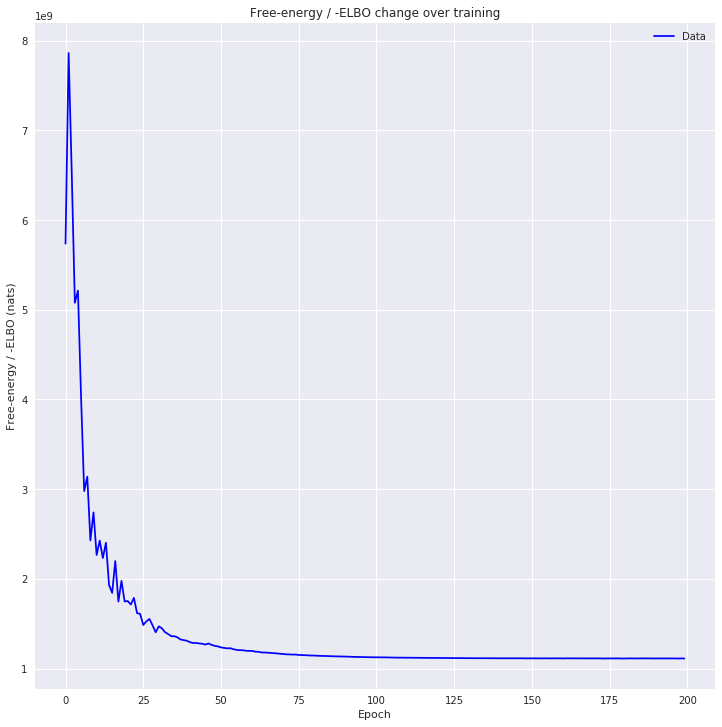

04/17/2018 15:53:21 Reconstruction Error (Frobenius Norm): 4.79585742e+03
04/17/2018 15:53:21 {'weights': array([[-0.26072675,  1.6026487 ,  0.58034474, ...,  0.61990345,
        -1.9424795 ,  0.29449493],
       [-1.256776  ,  0.7077058 ,  2.1028092 , ...,  0.18810228,
         0.02848818,  1.1467298 ],
       [-2.1832    ,  0.23513894,  2.0112538 , ..., -1.1704514 ,
         0.9306989 ,  1.5896075 ],
       ...,
       [-3.9737911 ,  0.30675527,  1.315655  , ..., -0.62618077,
         0.47467518,  0.11138095],
       [-4.0615797 ,  0.1368524 ,  2.6090956 , ..., -0.2031542 ,
         0.12429559, -0.81454164],
       [-5.4605565 ,  0.65018   ,  4.3132505 , ...,  2.0988467 ,
         0.59491456, -2.2841284 ]], dtype=float32), 'factors': array([[0.00992795, 0.01043671, 0.01091664, ..., 0.00888379, 0.00972143,
        0.01015682],
       [0.00113154, 0.00111037, 0.00108186, ..., 0.6598304 , 0.68550676,
        0.6446273 ],
       [0.00158618, 0.00158735, 0.0015805 , ..., 0.07074945, 0.073

In [7]:
utils.plot_losses(losses)

results = tfa.results()
logging.info(results)

In [8]:
posterior_sample = tfa.sample(posterior_predictive=True)

logging.info('Prior Reconstruction Error (Frobenius Norm): %.8e', np.linalg.norm(
    posterior_sample['Y0'].value.data.cpu().numpy() - tfa.voxel_activations.numpy()
))

posterior_sample

04/17/2018 15:53:23 Prior Reconstruction Error (Frobenius Norm): 4.82814600e+03


Trace{'Weights0': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x25]), 'Y0': Normal([torch.FloatTensor of size 1x300x94537])}

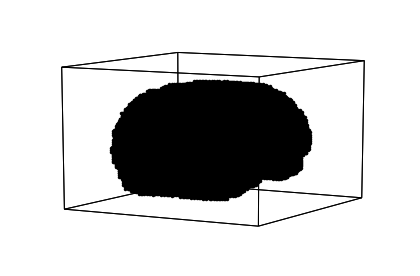

04/17/2018 15:53:23 Reconstruction Error (Frobenius Norm): 4.79529346e+03
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


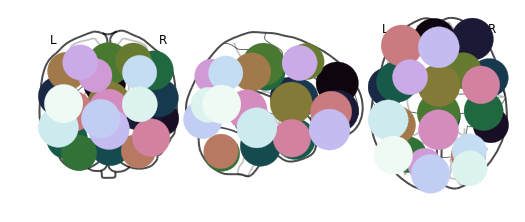

In [9]:
tfa.plot_voxels()
tfa.plot_factor_centers()

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


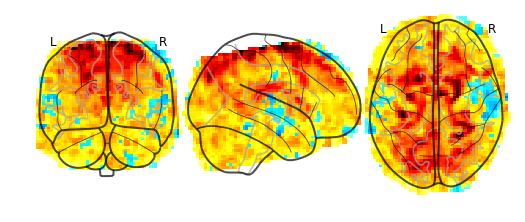

04/17/2018 15:53:24 Reconstruction Error (Frobenius Norm): 4.79524658e+03


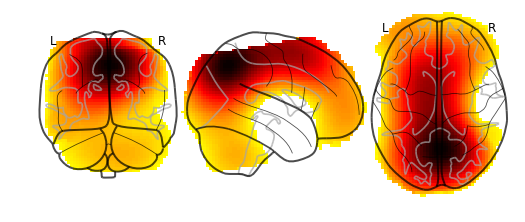

In [10]:
tfa.plot_original_brain()
tfa.plot_reconstruction()

04/17/2018 15:53:37 Reconstruction Error (Frobenius Norm): 4.79504297e+03
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


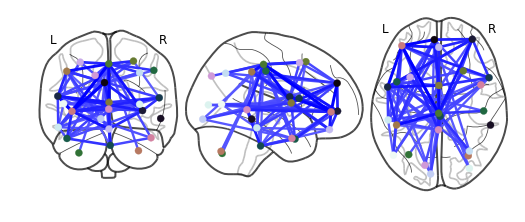

In [11]:
tfa.plot_connectome()